In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Các thư viện Scikit-learn (sklearn) cho HỒI QUY
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression # <-- Mô hình Hồi quy Tuyến tính 
from sklearn.svm import SVR # <-- Support Vector Regression (để tinh chỉnh)
from sklearn.metrics import mean_squared_error, r2_score # <-- Phương pháp đánh giá Hồi quy [cite: 8907]

# --- Tải Dữ liệu ---
file_path = 'airfoil_self_noise_data.csv'
df = pd.read_csv(file_path)

print("Tải dữ liệu thành công!")
print(df.head())

Tải dữ liệu thành công!
   frequency  attack-angle  chord-length  free-stream-velocity  \
0        800           0.0        0.3048                  71.3   
1       1000           0.0        0.3048                  71.3   
2       1250           0.0        0.3048                  71.3   
3       1600           0.0        0.3048                  71.3   
4       2000           0.0        0.3048                  71.3   

   suction-side-displacement-thickness  scaled-sound-pressure  
0                             0.002663                126.201  
1                             0.002663                125.201  
2                             0.002663                125.951  
3                             0.002663                127.591  
4                             0.002663                127.461  


In [3]:
print("--- Yêu cầu 1: Biểu diễn dữ liệu ---")

# 1. Tách X (đặc trưng) và y (mục tiêu)
# y là cột cuối cùng, X là 5 cột đầu tiên
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

--- Yêu cầu 1: Biểu diễn dữ liệu ---


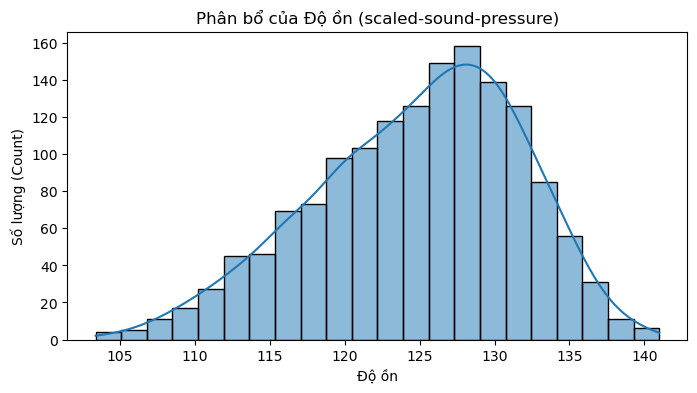

In [13]:
# 2. Vẽ biểu đồ phân bổ (Histogram) của cột mục tiêu 'y'
plt.figure(figsize=(8, 4))
sns.histplot(y, kde=True)
plt.title('Phân bổ của Độ ồn (scaled-sound-pressure)')
plt.xlabel('Độ ồn')
plt.ylabel('Số lượng (Count)')
plt.show()

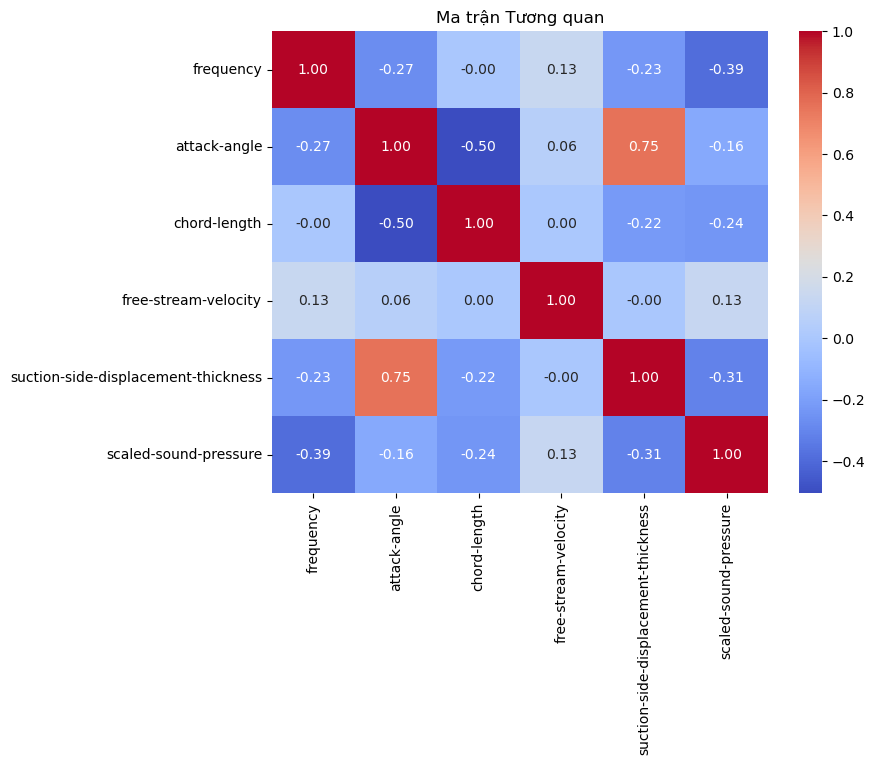

In [15]:
# 3. Vẽ biểu đồ tương quan (Heatmap)
# Xem các đặc trưng (X) liên quan đến nhau và đến 'y' như thế nào
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Ma trận Tương quan')
plt.show()

In [17]:
print("--- Yêu cầu 2 & 3: Huấn luyện và Đánh giá (Mô hình Hồi quy Tuyến tính) ---")

# --- Chia dữ liệu ---
# Không cần 'stratify' vì đây là hồi quy
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

--- Yêu cầu 2 & 3: Huấn luyện và Đánh giá (Mô hình Hồi quy Tuyến tính) ---


In [19]:
# --- Chuẩn hóa dữ liệu ---
# Rất quan trọng cho các mô hình Hồi quy (như SVR sau này)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Đã chuẩn hóa dữ liệu.")

Đã chuẩn hóa dữ liệu.


In [21]:
# --- Yêu cầu 2: Huấn luyện mô hình ---
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)
print("Đã huấn luyện xong mô hình LinearRegression.")

Đã huấn luyện xong mô hình LinearRegression.


In [23]:
# --- Yêu cầu 3: Đánh giá mô hình ---
y_pred_lr = model_lr.predict(X_test_scaled)

# 3.1. Dùng Mean Squared Error (MSE) 
# Đây là chỉ số quan trọng nhất: Sai số bình phương trung bình. CÀNG THẤP CÀNG TỐT.
mse_lr = mean_squared_error(y_test, y_pred_lr)
# RMSE là căn bậc hai của MSE, cho ta sai số trung bình (dễ hiểu hơn)
rmse_lr = np.sqrt(mse_lr) 
print(f"\n--- Đánh giá Hồi quy Tuyến tính ---")
print(f"Mean Squared Error (MSE): {mse_lr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.4f}")


--- Đánh giá Hồi quy Tuyến tính ---
Mean Squared Error (MSE): 22.1286
Root Mean Squared Error (RMSE): 4.7041


In [25]:
# 3.2. Dùng R-squared (R2 Score)
# Cho biết mô hình giải thích được bao nhiêu % sự biến động của y. CÀNG CAO CÀNG TỐT (tối đa là 1.0).
r2_lr = r2_score(y_test, y_pred_lr)
print(f"R-squared (R2 Score): {r2_lr:.4f}")

R-squared (R2 Score): 0.5583


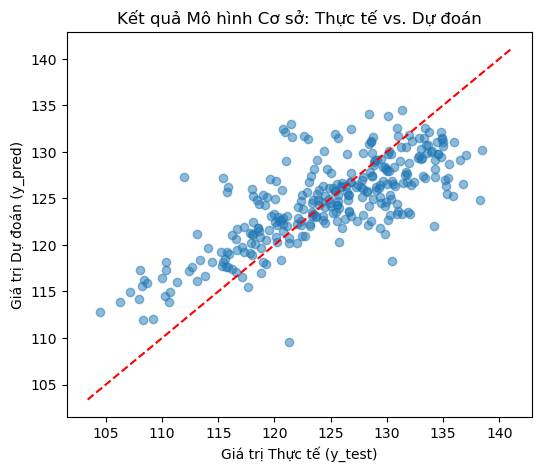

In [27]:
# 3.3. Vẽ biểu đồ dự đoán vs. thực tế
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--') # Đường tham chiếu y=x
plt.title('Kết quả Mô hình Cơ sở: Thực tế vs. Dự đoán')
plt.xlabel('Giá trị Thực tế (y_test)')
plt.ylabel('Giá trị Dự đoán (y_pred)')
plt.show()

--- Yêu cầu 4: Tinh chỉnh Mô hình (Grid Search với SVR) ---
Bắt đầu Grid Search cho SVR...
Fitting 5 folds for each of 9 candidates, totalling 45 fits

Grid Search hoàn tất!
Các tham số tốt nhất tìm được: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}

--- Đánh giá Mô hình SVR Tốt nhất ---
Mean Squared Error (MSE): 6.9876
Root Mean Squared Error (RMSE): 2.6434
R-squared (R2 Score): 0.8605


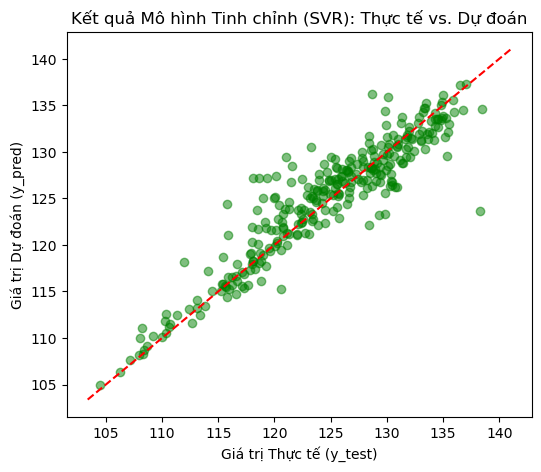

In [29]:
print("--- Yêu cầu 4: Tinh chỉnh Mô hình (Grid Search với SVR) ---")

# 1. Định nghĩa không gian tham số (param_grid)
# Chúng ta sẽ thử các giá trị cho SVR
param_grid = {
    'C': [1, 10, 100], # Giá trị phạt (regularization)
    'gamma': [0.1, 0.01, 'scale'], # Tham số của kernel 'rbf'
    'kernel': ['rbf'] # Kernel RBF (tương tự trong slide SVM)
}

# 2. Khởi tạo GridSearchCV
# Chúng ta muốn tối ưu 'neg_mean_squared_error' (MSE âm, vì GridSearch luôn TỐI ĐA HÓA)
grid_search = GridSearchCV(SVR(), 
                           param_grid, 
                           cv=5, 
                           scoring='neg_mean_squared_error', 
                           verbose=1)

print("Bắt đầu Grid Search cho SVR...")
# Chạy Grid Search trên TẬP HUẤN LUYỆN
grid_search.fit(X_train_scaled, y_train)

# 3. In ra kết quả tốt nhất
print("\nGrid Search hoàn tất!")
print(f"Các tham số tốt nhất tìm được: {grid_search.best_params_}")

# 4. Lấy mô hình tốt nhất
best_model = grid_search.best_estimator_

# --- Đánh giá lại mô hình TỐT NHẤT trên tập TEST ---
y_pred_best = best_model.predict(X_test_scaled)

print("\n--- Đánh giá Mô hình SVR Tốt nhất ---")
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Mean Squared Error (MSE): {mse_best:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_best:.4f}") # <-- So sánh với yêu cầu (<= 3.5)
print(f"R-squared (R2 Score): {r2_best:.4f}")

# Vẽ biểu đồ kết quả
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_best, alpha=0.5, c='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Kết quả Mô hình Tinh chỉnh (SVR): Thực tế vs. Dự đoán')
plt.xlabel('Giá trị Thực tế (y_test)')
plt.ylabel('Giá trị Dự đoán (y_pred)')
plt.show()